In [22]:
import netCDF4
import numpy as np

## Input data

In [14]:
# Open the netCDF file
file_path = "data/V5GL04.HybridPM25.NorthAmerica.202201-202212.nc"
dataset = netCDF4.Dataset(file_path)

# Print the global attributes
print("Global attributes:")
for attr_name in dataset.ncattrs():
    print(f"{attr_name}: {getattr(dataset, attr_name)}")

# Print the variable names (layers)
print("\nVariable names (layers):")
for var_name in dataset.variables:
    print(var_name)

Global attributes:
Title: Hybrid PM_2_._5 [\mug/m^3]
Contact: Aaron van Donkelaar <aaron.vandonkelaar@wustl.edu>
References: van Donkelaar et al., Monthly Global Estimates of Fine Particulate Matter and Their Uncertainty, Environ. Sci. & Tech., doi:10.1021/acs.est.1c05309.
Filename: C:\Users\Aaron\Documents\MATLAB\PM25_wMelanie\GlobalMonthlyGWR-Geo20230818-GM20230905-V20230921\NetCDF\GWRPM25\NorthAmerica\Annual\V5GL04.HybridPM25.NorthAmerica.202201-202212.nc
Format: NetCDF-4
Delta_Lat: 0.010000228881835938
Delta_Lon: 0.0099945068359375
SpatialCoverage: NorthAmerica
Start_Date: 20220101
End_Date: 20221231

Variable names (layers):
lon
lat
GWRPM25


In [29]:
pm25 = dataset.variables["GWRPM25"]
pm25

<class 'netCDF4._netCDF4.Variable'>
float32 GWRPM25(lat, lon)
    long_name: Hybrid PM_2_._5 [\mug/m^3]
    units: [\mug/m^3]
unlimited dimensions: 
current shape = (3000, 6700)
filling on, default _FillValue of 9.969209968386869e+36 used

In [31]:
# derive statistics from variable
print("\nVariable statistics:")
for var_name in dataset.variables:
    var = dataset.variables[var_name]
    # convert to array and exclude np.nan values
    var = np.array(var[:])
    var = var[~np.isnan(var)]
    print(f"{var_name}: min={var[:].min()}, max={var[:].max()}, mean={var[:].mean()}")



Variable statistics:
lon: min=-131.9949951171875, max=-65.00499725341797, mean=-98.5
lat: min=25.0049991607666, max=54.994998931884766, mean=40.0
GWRPM25: min=0.5, max=46.79999923706055, mean=5.447871685028076


In [24]:
pm25[:]

masked_array(
  data=[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [3.3, 3.3, 3.3, ..., 2.3, 2.3, 2.3],
        [3.3, 3.3, 3.3, ..., 2.3, 2.3, 2.3],
        [3.3, 3.3, 3.3, ..., 2.3, 2.4, 2.3]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [27]:
# Find the indices where var[:] is equal to 1e+20
indices = np.where(var[:] == 1e+20)
print(indices)

if indices[0].size > 0:
    # Get the values at those indices
    values = var[indices]

    # Print the values
    print(values)

(array([], dtype=int64), array([], dtype=int64))


In [28]:
# number of entries in var equal to np.nan
print(np.count_nonzero(np.isnan(var[:])))

6728073


/Users/mia694/miniconda3/envs/satellite_pm25_raster2polygon/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


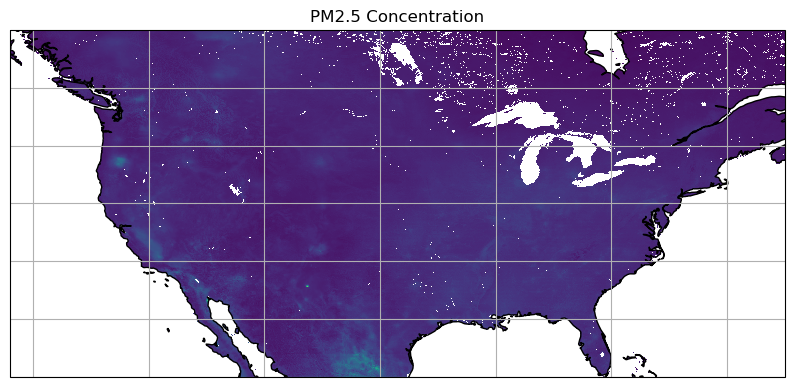

In [36]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Open the netCDF file
file_path = "data/V5GL04.HybridPM25.NorthAmerica.202201-202212.nc"
dataset = netCDF4.Dataset(file_path)

# Get the latitude and longitude variables
lat = dataset.variables["lat"]
lon = dataset.variables["lon"]

# Get the PM25 variable
pm25 = dataset.variables["GWRPM25"]

# Create a map plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the PM25 data on the map
plt.pcolormesh(lon[:], lat[:], pm25[:], transform=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.gridlines()

# Set plot title
plt.title("PM2.5 Concentration")

# Show the plot
plt.show()

# Close the netCDF file
dataset.close()


In [32]:
# Close the netCDF file
dataset.close()


## Output

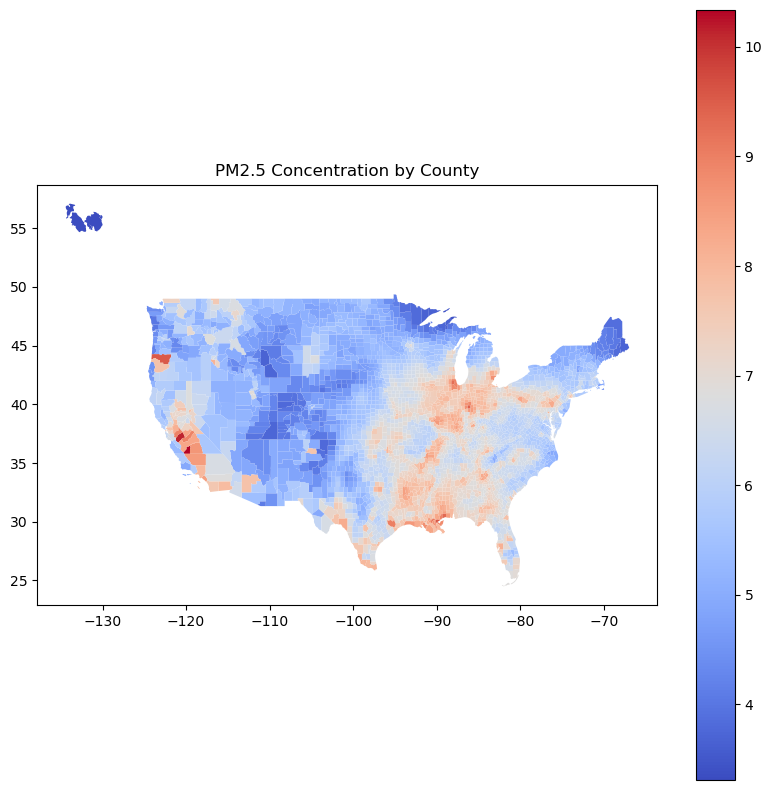

In [45]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
pm25_data = pd.read_csv('data/county_pm25.csv')
# Convert GEOID to string using trailing zeros
pm25_data['GEOID'] = pm25_data['GEOID'].astype(str).str.zfill(5)

# Read the shapefile
shapefile = gpd.read_file('data/shapefile_cb_county_2015/shapefile.shp')

# Merge the data
merged_data = shapefile.merge(pm25_data, on='GEOID', how='left')

# Create a map
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(ax=ax, column='mean', cmap='coolwarm', legend=True)
ax.set_title('PM2.5 Concentration by County')
plt.show()


Using the default year of 2021


<Axes: >

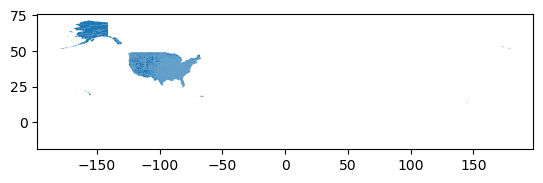

In [2]:
import pygris
pygris.counties().plot()

In [43]:
shapefile.GEOID.dtype

dtype('O')